In [1]:
#Importation des librairies 
import umap
import umap.plot
from sklearn.cluster import DBSCAN
import warnings
import hdbscan
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import decomposition
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Pour les biplot
from bioinfokit.visuz import cluster
from IPython import display
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import  PowerTransformer
from scipy import stats
from sklearn.preprocessing import  QuantileTransformer
pt = PowerTransformer()
qt = QuantileTransformer(output_distribution='normal')
#import matplotlib.pyplot as plt3D
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings('ignore')
import datetime
sns.set(style='white', context='notebook', rc={'figure.figsize': (8, 6)})


In [2]:
data_full = pd.read_csv(
    "/Users/anis/test_labnbook/test_3_indicateurs/comparaison/data.csv")
data_full.drop(["Unnamed: 0"], axis=1, inplace=True)
# Supprimer les labdocs ayant un score de contribution nul

data_full.drop(
    index=data_full[data_full["equi_contrib"] < 0].index.values, inplace=True)
#data_full.drop(["n_users", "n_modif",	"duree",  "n_mots"], axis=1, inplace=True)

data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17506 entries, 0 to 17506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_labdoc     17506 non-null  int64  
 1   n_users       17506 non-null  int64  
 2   n_mots        17506 non-null  int64  
 3   collab        17506 non-null  float64
 4   equi_contrib  17506 non-null  float64
 5   n_modif       17506 non-null  int64  
 6   duree         17506 non-null  float64
 7   pass_main     17506 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [3]:
data_full.head()

,id_labdoc,n_users,n_mots,collab,equi_contrib,n_modif,duree,pass_main
0,313544,3,67,0.086970,0.089902,13,1934637.0,3
1,325259,2,180,0.616471,0.947732,64,215938.0,1
2,313676,3,110,0.035226,0.036662,66,1818387.0,1
3,313555,3,152,0.066678,0.069033,9,1933760.0,1
4,312700,5,38,0.555177,0.555177,18,2278994.0,6


# Analyse univarié

In [4]:
y = data_full["id_labdoc"]
X = data_full.drop(["id_labdoc"], axis=1).copy()
n, p = np.shape(X)
X.head()

,n_users,n_mots,collab,equi_contrib,n_modif,duree,pass_main
0,3,67,0.086970,0.089902,13,1934637.0,3
1,2,180,0.616471,0.947732,64,215938.0,1
2,3,110,0.035226,0.036662,66,1818387.0,1
3,3,152,0.066678,0.069033,9,1933760.0,1
4,5,38,0.555177,0.555177,18,2278994.0,6


## Variable n_users

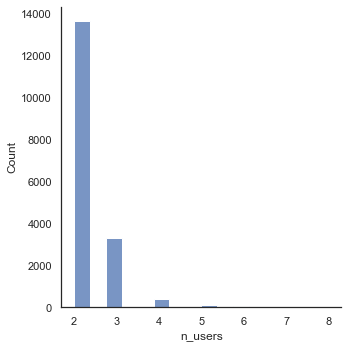

In [5]:
sns.displot(X["n_users"])
plt.show()


In [6]:
# Fréquence de chaque valeurs de n_users
X.groupby('n_users').size()/n * 100 

n_users
2    77.841883
3    18.770707
4     2.319205
5     0.679767
6     0.245630
7     0.114247
8     0.028562
dtype: float64

n_user est une variable discrète. 78% des labdocs texte environs sont écrit par deux utilisateurs

## Variable n_mots

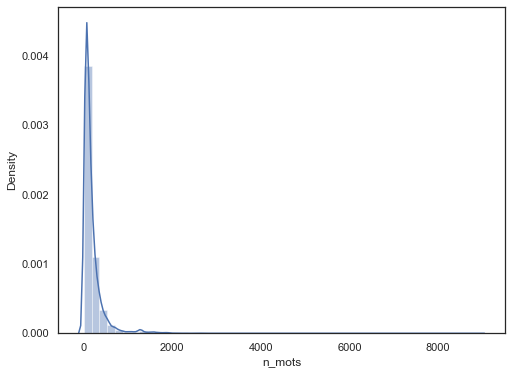

In [7]:
sns.distplot(X["n_mots"])
plt.show()

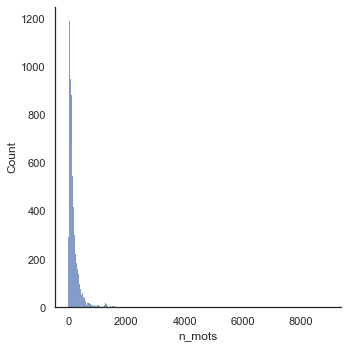

In [8]:
sns.displot(X["n_mots"])
plt.show()


In [9]:
X["n_mots"].describe()

count    17506.000000
mean       185.407175
std        262.671022
min          1.000000
25%         59.000000
50%        112.000000
75%        213.000000
max       8936.000000
Name: n_mots, dtype: float64

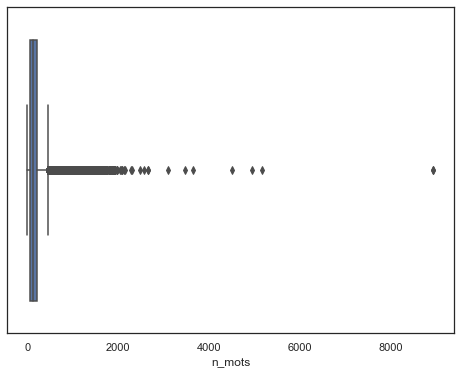

In [10]:
sns.boxplot((X["n_mots"]))
plt.show()

* n_mots est une variable continue qui a une distribution de type puissance. Elle contient beaucoup de valeurs atypiques i.e des labdocs relativement long par rapport au 75% des labdocs qui ont une longueur de 213. mots.
* Comment gérer ses valeurs atypiques ? On les garde ou on les supprime en les considérant comme des valeurs aberrantes ?

## Variable collab

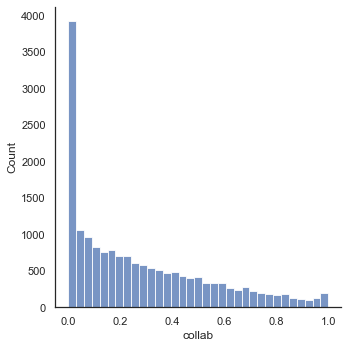

In [11]:
sns.displot(X["collab"])
plt.show()

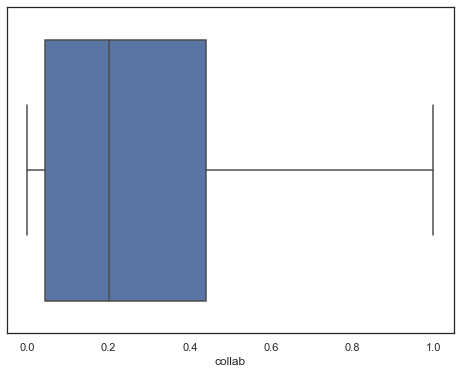

In [12]:
sns.boxplot(X["collab"])
plt.show()


In [13]:
X["collab"].describe()

count    17506.000000
mean         0.273715
std          0.262631
min          0.000000
25%          0.042426
50%          0.200533
75%          0.439141
max          1.000000
Name: collab, dtype: float64

In [14]:
# Fréquence des labdocs avec un indice de collaboration null 
np.sum(X.collab == 0)/n * 100 

11.92733919798926

<AxesSubplot:xlabel='collab', ylabel='Density'>

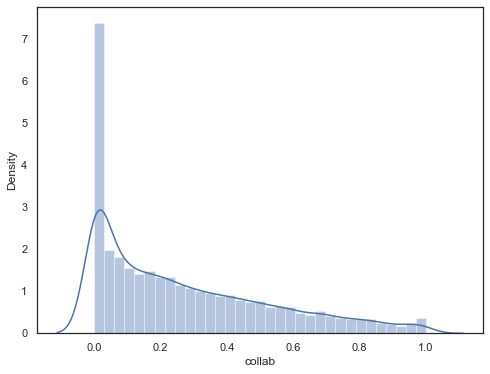

In [15]:
sns.distplot(X["collab"])

* L'indice de collaboration est une variable continue en 0 et 1. Les labdocs ayant un score 0 représentent environs 12% du total. Elle a une distribution asymétrique à droite 

## Variable equi_contrib

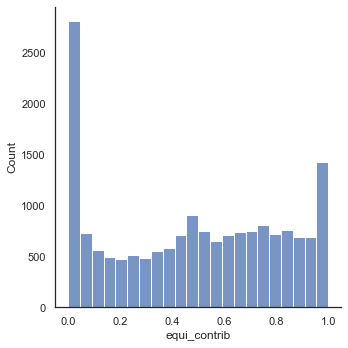

In [16]:
sns.displot(X.equi_contrib)
plt.show()

<AxesSubplot:xlabel='equi_contrib'>

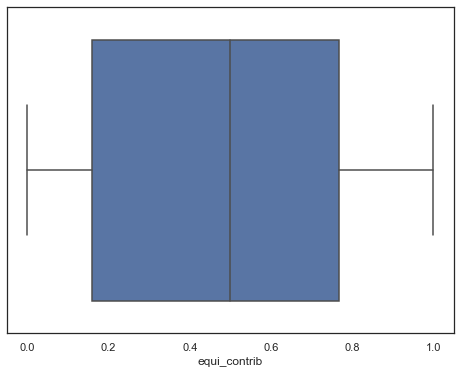

In [17]:
sns.boxplot(X.equi_contrib)

In [18]:
X.equi_contrib.describe()

count    17506.000000
mean         0.481809
std          0.329359
min          0.000000
25%          0.160096
50%          0.499046
75%          0.767850
max          1.000000
Name: equi_contrib, dtype: float64

In [19]:
print(np.sum(X.equi_contrib == 0) / n * 100, np.sum(X.equi_contrib == 1) / n * 100)

7.077573403404546 0.09139723523363419


* C'est une variable continue qui ne ressemblent pas a une loi connu. 7% des labdcos on un score 0 et 1% un score 1

# Variable pass_main

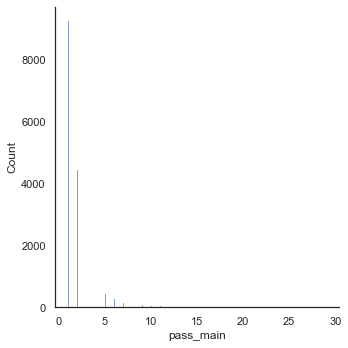

In [20]:
sns.displot(X.pass_main)

<AxesSubplot:xlabel='pass_main'>

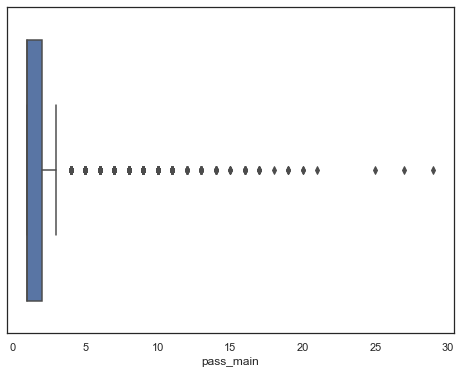

In [21]:
sns.boxplot(X.pass_main)

In [22]:
X.pass_main.describe()

count    17506.000000
mean         1.987661
std          1.668146
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: pass_main, dtype: float64

In [23]:
pd.DataFrame([X.groupby("pass_main").size()/ n * 100])


pass_main,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,27,29
0,52.810465,25.242774,10.3336,5.209642,2.524849,1.508054,0.822575,0.451274,0.348452,0.24563,0.159945,0.062836,0.079973,0.045699,0.017137,0.051411,0.028562,0.005712,0.017137,0.011425,0.005712,0.005712,0.005712,0.005712


* C'est une variable discréte répartie entre 1 et 2 avec beaucoup de valeurs atypique 
* 50 % des labdocs on un score de coécriture de 1.
* Il faudra gérer les valeurs atypiques  

## Variable n_modif

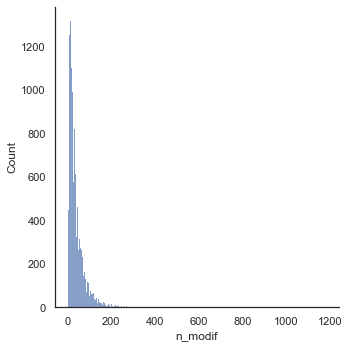

In [24]:
sns.displot(X.n_modif)

<AxesSubplot:xlabel='n_modif'>

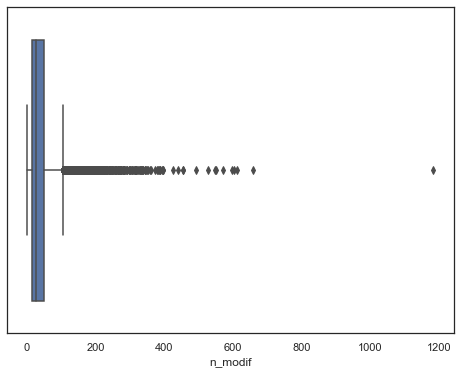

In [25]:
sns.boxplot(X.n_modif)

In [26]:
X.n_modif.describe()

count    17506.000000
mean        40.162801
std         43.345594
min          2.000000
25%         14.000000
50%         27.000000
75%         50.000000
max       1183.000000
Name: n_modif, dtype: float64

* c'est une variable continue de type puissance
* Beaucoup de valeurs atypique
* Voir si elle n'est pas corrélée avec d'autre variables comme n_modif ou durée 

## Variable duree

<AxesSubplot:xlabel='duree', ylabel='Density'>

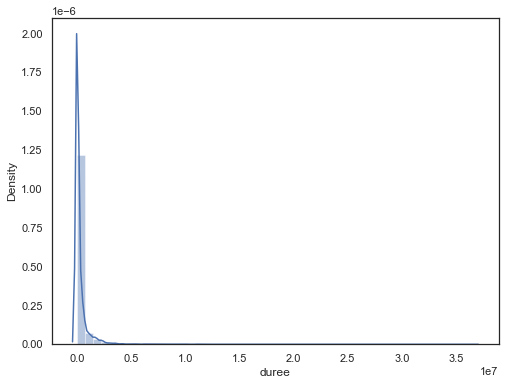

In [27]:
sns.distplot(X.duree)

<AxesSubplot:xlabel='duree'>

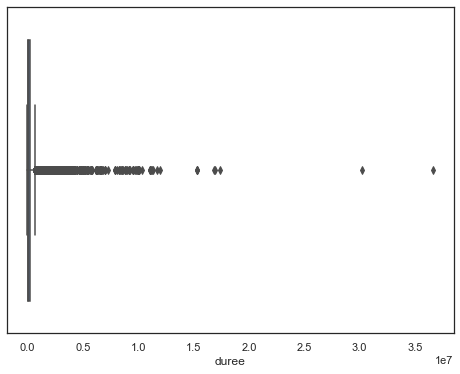

In [28]:
sns.boxplot((X.duree))


In [29]:
X.duree.describe()

count    1.750600e+04
mean     3.152077e+05
std      9.085073e+05
min      2.300000e+01
25%      3.762750e+03
50%      4.137650e+04
75%      2.628605e+05
max      3.664991e+07
Name: duree, dtype: float64

In [30]:
str(datetime.timedelta(seconds=3.664991e+07))


'424 days, 4:31:50'

* C'est une variable continue de type puissance de moyenne 3 days, 15:33:27.
* Il y a beaucoup de valeurs atypiques.

## Conclusion 
variable discrétes : Indice de coécriture et n_users. Les autres sont continues.
Il y a beaucoup de valeurs atypiques. Il faudrait faire des transformations de variable de type log 

# Analyse multivariée 

* Comme il y'a beaucoup de valeurs aberrantes sur certaines variables. Il sera difficile de détecter la corrélation visuellement. Je vais les supprimer avec la méthode des quantiles 
* Attention il faudra interpréter la corrélation qu'entre les variables continue 

In [31]:
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtred = X[filtered_entries]


In [32]:
# Fréquence des labdocs abérants 
100*(n - np.shape(X_filtred)[0])/n 

6.414943447960699

* Environs 6.5% des données sont considérés comme aberrantes 

<AxesSubplot:>

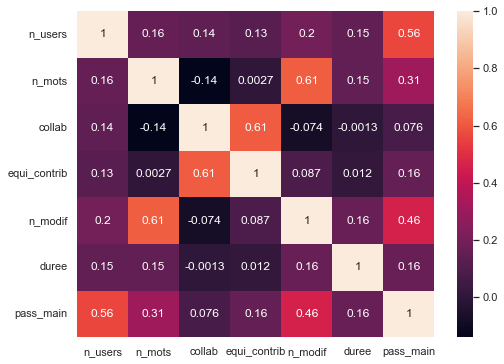

In [33]:
sns.heatmap(X.corr(),annot=True)

<AxesSubplot:>

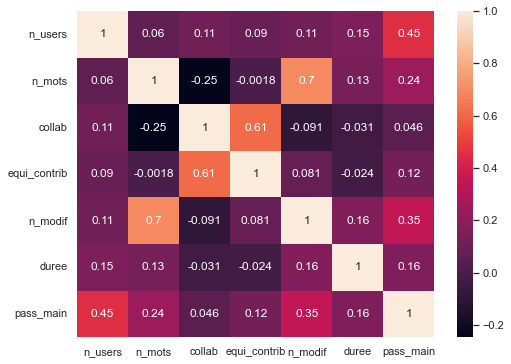

In [34]:
sns.heatmap(X_filtred.corr(),annot=True)

## n_modif vs n_mot 

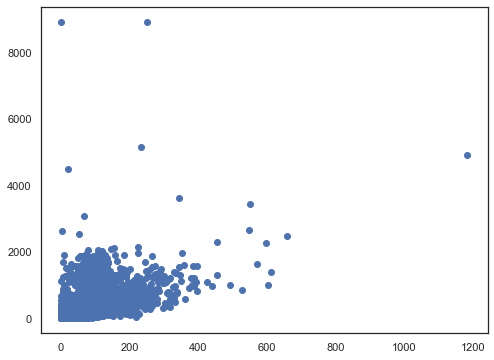

In [35]:
plt.scatter(X.n_modif, X.n_mots)

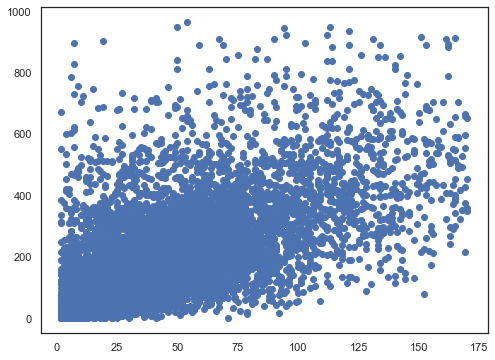

In [36]:
plt.scatter(X_filtred.n_modif, X_filtred.n_mots)

* Il y'a clairement une forte corrélation entre ces deux variables. Nous devons supprimer l'une d'être elle. L'idée c'est de supprimé celle qui est corrélée avec d'autres variables 

## collab vs equi_contrib

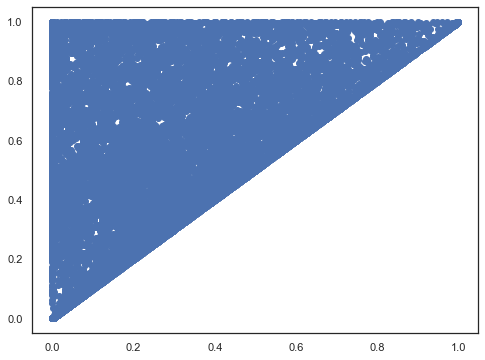

In [37]:
plt.scatter(X.collab, X.equi_contrib)

* Forte corrélation linéaire entre la variable collab et equi_contrib

## n_users vs pass_main

<AxesSubplot:xlabel='n_users', ylabel='pass_main'>

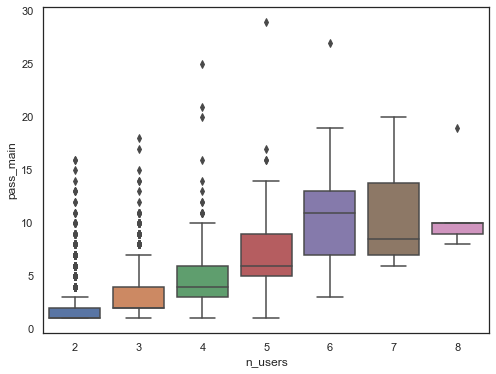

In [38]:
sns.boxplot(x="n_users", y="pass_main", data=X)

<AxesSubplot:xlabel='n_users', ylabel='pass_main'>

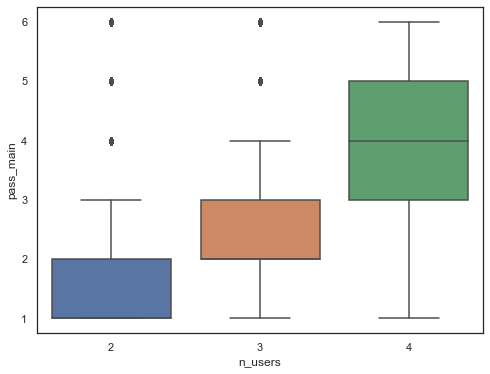

In [39]:
sns.boxplot(x="n_users", y="pass_main", data=X_filtred)

* Il y'a clairement un effet n_users sur pass_main. On peut dire que le  pass_main augmente quand le nombre d'utilisateurs augmentent plus.


## n_users vs collab 

<AxesSubplot:xlabel='n_users', ylabel='collab'>

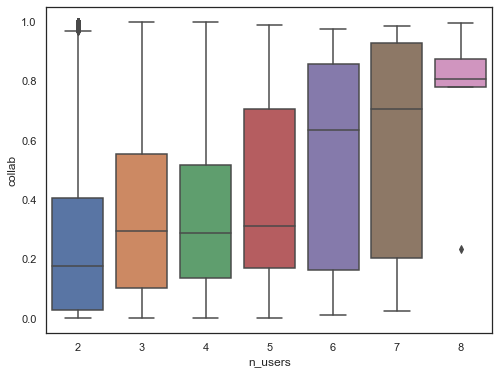

In [40]:
sns.boxplot(x="n_users", y="collab", data=X)

<AxesSubplot:xlabel='n_users', ylabel='collab'>

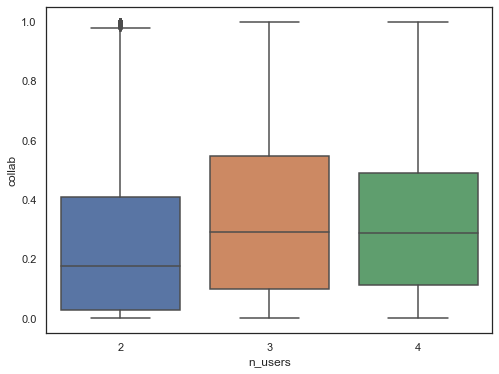

In [41]:
sns.boxplot(x="n_users", y="collab", data=X_filtred)


* Je ne peux pas dire grand chose. Je part du principe qu'il n ya pas d'effet n_users sur collab
* Il faudrait faire des testes de type ANOVa mais pour cela collab doit étre gaussienne et ce n'est pas le cas 

## n_users vs contrib 

<AxesSubplot:xlabel='n_users', ylabel='equi_contrib'>

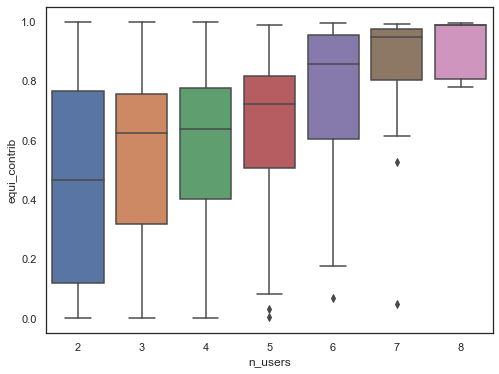

In [42]:
sns.boxplot(x="n_users", y="equi_contrib", data=X)

<AxesSubplot:xlabel='n_users', ylabel='equi_contrib'>

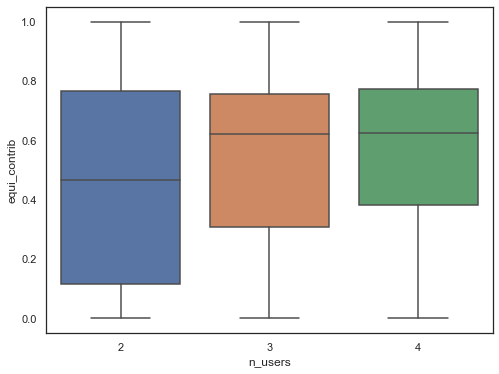

In [43]:
sns.boxplot(x="n_users", y="equi_contrib", data=X_filtred)

* On ne peut rien conclure ici non plus
* La variance n'est meme pas la meme donc on ne peut pas faire d'anova 

## n_modif vs pass_main

<AxesSubplot:xlabel='pass_main', ylabel='n_modif'>

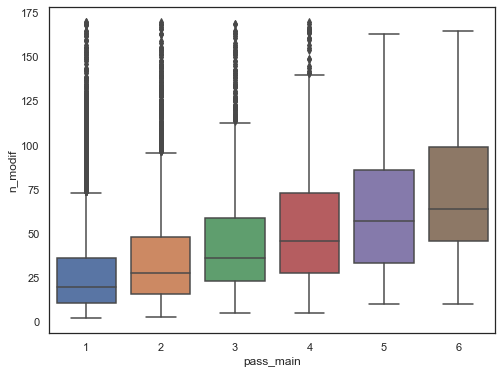

In [44]:
sns.boxplot(x="pass_main", y="n_modif", data=X_filtred)

* On remarque que plus le pass_main et grand plus n_modif et grand (logique)
* On devrait peut étre enlever n_modif 

## Duree vs pass_main

<AxesSubplot:xlabel='pass_main', ylabel='duree'>

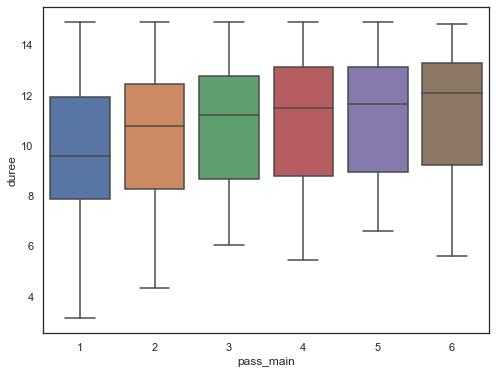

In [45]:
sns.boxplot(x="pass_main", y=np.log(X_filtred.duree), data=X_filtred)


* il y a un effet pass_main sur la duree
* Plus il se passent la labdocs plus celui-ci dure longtemps
* J'enleve la variable duree

## Pass_main vs Collab

<AxesSubplot:xlabel='pass_main', ylabel='collab'>

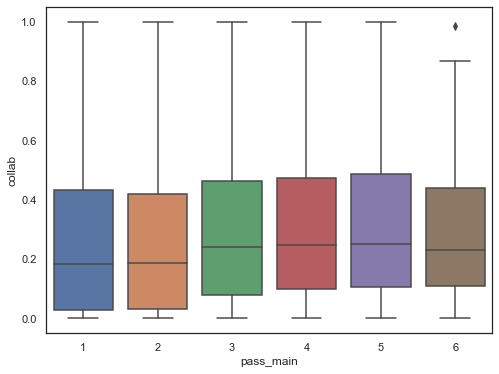

In [46]:
sns.boxplot(x="pass_main", y=X_filtred.collab, data=X_filtred)

* Il n'ya pas d'effet pass_main sur la collaboration. Pas de relation entre les deux

## Pass_main contrib 

<AxesSubplot:xlabel='pass_main', ylabel='equi_contrib'>

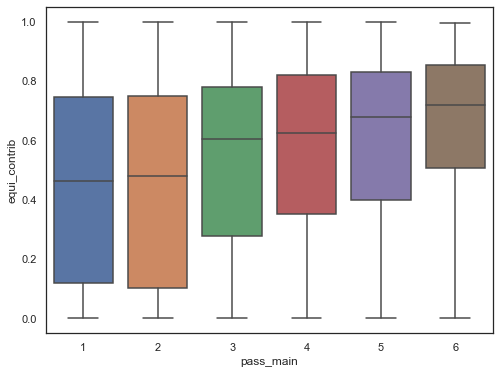

In [47]:
sns.boxplot(x="pass_main", y=X_filtred.equi_contrib, data=X_filtred)

* On est tenté de dire qu'il y a un effet pass_main sur l'équilibre de contribution. Autrement dit; plus le pass_main est grand plus la contribution est grande. 
* Attention; la variance n'est pas la même dans pass_main. Par conséquence l'interprétation visuelle est trompeuse. Je vais donc garder cette variable (pass_main)

# A faire : 
* enlever n_modif, duree et n_users

In [48]:
X_filtred.drop(["n_modif", "duree", "n_users"],axis= 1, inplace= True)

<AxesSubplot:>

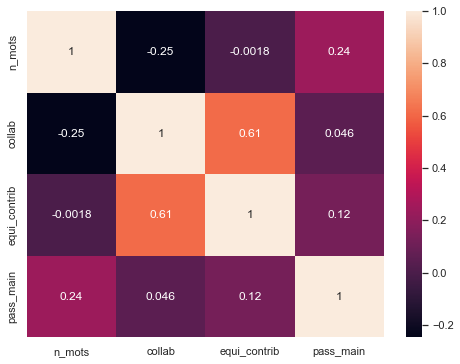

In [49]:
sns.heatmap(X_filtred.corr(),annot=True)

* La corrélation négative entre collab et n_mots voudrait dire que plus le labdoc est long et moins il y a collaboration. On retrouve le résultat de : la collaboration est forte sur les petits labdocs

In [50]:
X_filtred.describe()

,n_mots,collab,equi_contrib,pass_main
count,16383.000000,16383.000000,16383.000000,16383.000000
mean,148.293475,0.271480,0.476576,1.772203
std,134.683680,0.263051,0.330509,1.101377
min,1.000000,0.000000,0.000000,1.000000
25%,56.000000,0.038260,0.148887,1.000000
50%,107.000000,0.197971,0.494112,1.000000
75%,194.000000,0.436892,0.763632,2.000000
max,966.000000,1.000000,1.000000,6.000000


<AxesSubplot:xlabel='pass_main', ylabel='Density'>

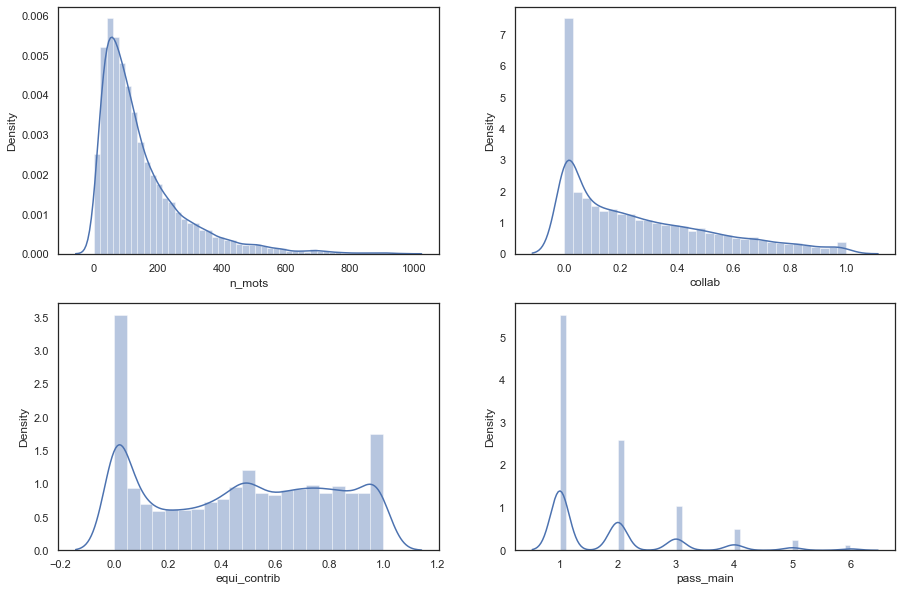

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(X_filtred["n_mots"], ax=axes[0, 0])
sns.distplot(X_filtred["collab"], ax=axes[0, 1])
sns.distplot(X_filtred["equi_contrib"], ax=axes[1, 0])
sns.distplot(X_filtred["pass_main"], ax=axes[1, 1])

<AxesSubplot:ylabel='Density'>

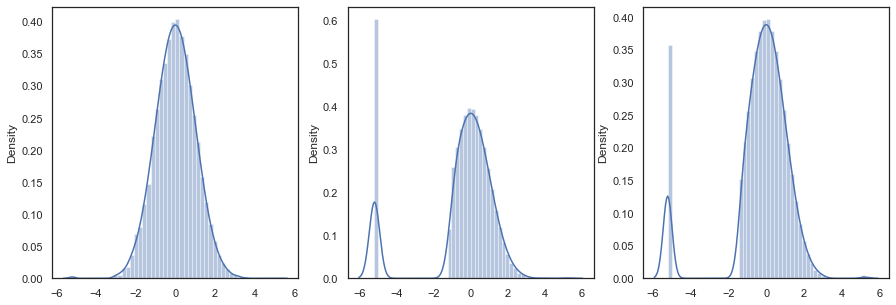

In [52]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(qt.fit_transform(
    np.array(X_filtred["n_mots"]).reshape(-1, 1)), ax=axes[0])
sns.distplot(qt.fit_transform(
    np.array(X_filtred["collab"]).reshape(-1, 1)), ax=axes[1])
sns.distplot(qt.fit_transform(
    np.array(X_filtred["equi_contrib"]).reshape(-1, 1)), ax=axes[2])


<AxesSubplot:>

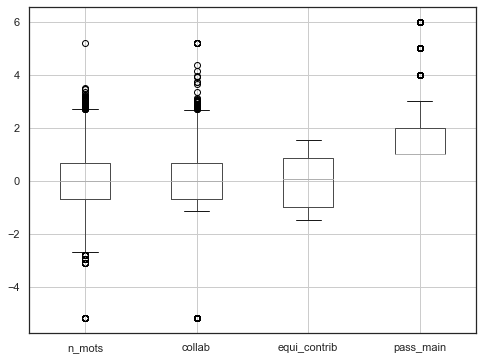

In [53]:
X_filtred_trans = X_filtred.copy()
X_filtred_trans["n_mots"] = qt.fit_transform(
    np.array(X_filtred["n_mots"]).reshape(-1, 1))
X_filtred_trans["collab"] = qt.fit_transform(
    np.array(X_filtred["collab"]).reshape(-1, 1))
X_filtred_trans["equi_contrib"] = pt.fit_transform(
    np.array(X_filtred["equi_contrib"]).reshape(-1, 1))
X_filtred_trans.boxplot()

In [54]:
X_filtred.describe()

,n_mots,collab,equi_contrib,pass_main
count,16383.000000,16383.000000,16383.000000,16383.000000
mean,148.293475,0.271480,0.476576,1.772203
std,134.683680,0.263051,0.330509,1.101377
min,1.000000,0.000000,0.000000,1.000000
25%,56.000000,0.038260,0.148887,1.000000
50%,107.000000,0.197971,0.494112,1.000000
75%,194.000000,0.436892,0.763632,2.000000
max,966.000000,1.000000,1.000000,6.000000


In [55]:
# Normaliser les variables continues
scaler = StandardScaler()
X_filtred_trans_std = X_filtred_trans.copy()
X_filtred_trans_std[["n_mots", "collab", "equi_contrib"]] = scaler.fit_transform(X_filtred_trans[["n_mots", "collab", "equi_contrib"]])

# Recoder la variable pass_main
X_filtred_trans_std = pd.get_dummies(
    X_filtred_trans_std, columns=["pass_main"])
X_filtred_trans_std


,n_mots,collab,equi_contrib,pass_main_1,pass_main_2,pass_main_3,pass_main_4,pass_main_5,pass_main_6
0,-0.497128,0.014714,-1.176221,0,0,1,0,0,0
1,0.587428,0.800022,1.401523,1,0,0,0,0,0
2,0.039677,-0.128711,-1.347532,1,0,0,0,0,0
3,0.406341,-0.035896,-1.243166,1,0,0,0,0,0
5,-1.463088,0.365156,-0.450818,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17502,0.527580,-0.008011,1.027105,1,0,0,0,0,0
17503,-0.362697,0.163171,-0.159918,1,0,0,0,0,0
17504,-0.189914,-0.154257,-1.372393,0,0,1,0,0,0
17505,0.248136,-0.024604,1.465246,0,1,0,0,0,0


In [56]:
X_filtred.describe()


,n_mots,collab,equi_contrib,pass_main
count,16383.000000,16383.000000,16383.000000,16383.000000
mean,148.293475,0.271480,0.476576,1.772203
std,134.683680,0.263051,0.330509,1.101377
min,1.000000,0.000000,0.000000,1.000000
25%,56.000000,0.038260,0.148887,1.000000
50%,107.000000,0.197971,0.494112,1.000000
75%,194.000000,0.436892,0.763632,2.000000
max,966.000000,1.000000,1.000000,6.000000


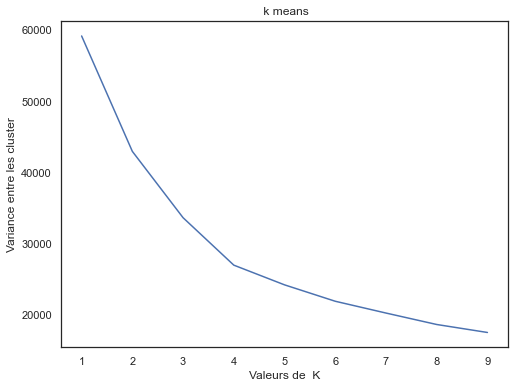

In [57]:
#Trouver le meilleur K
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
    model = KMeans(n_clusters=num_clusters)
    model.fit(X_filtred_trans_std)
    Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('Valeurs de  K')
plt.ylabel('Variance entre les cluster')
plt.title(' k means')
plt.show()


In [58]:
n_clusters = 4
kmeans_labels = KMeans(n_clusters=n_clusters).fit_predict(
    X_filtred_trans_std)

gb = X_filtred.groupby(kmeans_labels)
result = pd.DataFrame(gb.mean())
result["freq %"] = gb.size() / np.shape(X_filtred)[0] * 100
result.append(X_filtred.mean(), ignore_index=True)


,n_mots,collab,equi_contrib,pass_main,freq %
0,55.047269,0.538193,0.700080,1.598739,29.054508
1,261.329344,0.286111,0.681757,2.259457,28.560093
2,120.438596,0.000000,0.272922,1.479532,12.525179
3,142.593418,0.111845,0.148281,1.597711,29.860221
4,148.293475,0.271480,0.476576,1.772203,NaN
